In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
#1q = July 11 - October 31, 2q = November 1 - October 31, 3q = July 11 - October 31, 4q = July 11 - October 31
us_data = pd.read_excel('Copy of TOP_10k_US_08162022.xlsx', header = None, names = ['UPC', 'Rank', 'Dpmt_rank', 'Department', 'Category', 'Subcategory', 'Brand', 'Description', 'Sales_annual', 'Sales_annual_yago',
                                                                                        'Sales_annual_perc', 'Qty_annual', 'Qty_annual_yago', 'Qty_annual_perc', 'ARP_annual', 'ARP_annaul_yago', 'ARP_annual_perc',
                                                                                        'Sales_1q', 'Sales_1q_yago', 'Sales_1q_perc', 'Qty_1q', 'Qty_1q_yago', 'Qty_1q_perc', 'ARP_1q', 'ARP_1q_yago', 'ARP_1q_perc',
                                                                                        'Sales_2q', 'Sales_2q_yago', 'Sales_2q_perc', 'Qty_2q', 'Qty_2q_yago', 'Qty_2q_perc', 'ARP_2q', 'ARP_2q_yago', 'ARP_2q_perc',
                                                                                         'Sales_3q', 'Sales_3q_yago', 'Sales_3q_perc', 'Qty_3q', 'Qty_3q_yago', 'Qty_3q_perc', 'ARP_3q', 'ARP_3q_yago', 'ARP_3q_perc',
                                                                                         'Sales_4q', 'Sales_4q_yago', 'Sales_4q_perc', 'Qty_4q', 'Qty_4q_yago', 'Qty_4q_perc', 'ARP_4q', 'ARP_4q_yago', 'ARP_4q_perc'])[1:]

atlantic_data = pd.read_excel('Copy of Top_10k_MidAtlantic.xlsx', header = None, names = ['UPC', 'Rank', 'Dpmt_rank', 'Department', 'Category', 'Subcategory', 'Brand', 'Description', 'Sales_annual', 'Sales_annual_yago',
                                                                                        'Sales_annual_perc', 'Qty_annual', 'Qty_annual_yago', 'Qty_annual_perc', 'ARP_annual', 'ARP_annaul_yago', 'ARP_annual_perc',
                                                                                        'Sales_1q', 'Sales_1q_yago', 'Sales_1q_perc', 'Qty_1q', 'Qty_1q_yago', 'Qty_1q_perc', 'ARP_1q', 'ARP_1q_yago', 'ARP_1q_perc',
                                                                                        'Sales_2q', 'Sales_2q_yago', 'Sales_2q_perc', 'Qty_2q', 'Qty_2q_yago', 'Qty_2q_perc', 'ARP_2q', 'ARP_2q_yago', 'ARP_2q_perc',
                                                                                         'Sales_3q', 'Sales_3q_yago', 'Sales_3q_perc', 'Qty_3q', 'Qty_3q_yago', 'Qty_3q_perc', 'ARP_3q', 'ARP_3q_yago', 'ARP_3q_perc',
                                                                                         'Sales_4q', 'Sales_4q_yago', 'Sales_4q_perc', 'Qty_4q', 'Qty_4q_yago', 'Qty_4q_perc', 'ARP_4q', 'ARP_4q_yago', 'ARP_4q_perc'])[1:]

In [3]:
us_data.head()

UPC Rank Dpmt_rank    Department           Category  \
1  08-61745-00001    1         1  REFRIGERATED  REFRIGERATED EGGS   
2  07-15756-20011    2         1       PRODUCE            PRODUCE   
3  07-15756-10004    3         2       PRODUCE            PRODUCE   
4  08-61745-00002    4         2  REFRIGERATED  REFRIGERATED EGGS   
5  07-15756-20002    5         3       PRODUCE            PRODUCE   

              Subcategory              Brand  \
1                 RF EGGS        VITAL FARMS   
2  PRODUCE PACKAGED FRUIT  DRISCOLLS ORGANIC   
3  PRODUCE PACKAGED FRUIT  DRISCOLLS ORGANIC   
4                 RF EGGS        VITAL FARMS   
5  PRODUCE PACKAGED FRUIT          DRISCOLLS   

                                  Description Sales_annual Sales_annual_yago  \
1     Vital Farms Pasture Raised Eggs Lg 12ct  2.68068e+07       2.52078e+07   
2              Driscolls Strawbrries Og 16 Oz  2.50707e+07       2.34464e+07   
3               Driscolls Raspberries Og 6 Oz  2.43931e+07       2.03405e+07   
4  Vital Farms Pasture Raised Eggs Lg Og 12ct  2.31868e+07       1.84609e+07   
5                  Driscolls Strawberry 16 Oz  2.19305e+07       2.41242e+07   

   ... ARP_3q_perc     Sales_4q Sales_4q_yago Sales_4q_perc       Qty_4q  \
1  ...  -0.0266667  5.92498e+06   5.67394e+06      0.044245       945152   
2  ...  0.00429799  5.85589e+06   6.00227e+06    -0.0243874  1.14579e+06   
3  ...  -0.0685413  6.86289e+06   6.12548e+06      0.120385      1474718   
4  ...   0.0207407  5.61833e+06   4.67159e+06      0.202658       779649   
5  ...    0.170115  5.28311e+06   4.60086e+06      0.148289  1.32892e+06   

   Qty_4q_yago Qty_4q_perc ARP_4q ARP_4q_yago ARP_4q_perc  
1       984870  -0.0403281   6.27        5.76   0.0885417  
2  1.22781e+06  -0.0668051   5.11        4.89   0.0449898  
3  1.34995e+06   0.0924219   4.65        4.54   0.0242291  
4       694310    0.122912   7.21        6.73   0.0713224  
5  1.07929e+06    0.231289   3.98        4.26  -0.0657277  

[5 rows x 53 columns]

### Data Cleaning

In [4]:
#store column names
us_column = us_data.columns
atlantic_column = atlantic_data.columns

In [5]:
#seperate and store the null rows for the future analysis
us_null_data = us_data[us_data.isnull().any(axis=1)]
atlantic_null_data = atlantic_data[atlantic_data.isnull().any(axis=1)]

In [6]:
#fill up the null values from the original data (with 0 values)
us_data = us_data.fillna(0, axis = 1)
atlantic_data = atlantic_data = us_data.fillna(0, axis = 1)

In [10]:
us_data.Department.nunique(), us_data.Category.nunique(), us_data.Subcategory.nunique()

(11, 100, 404)

In [37]:
us_data.groupby(['Department', 'Category'], as_index=False).size()

Department                                  Category  size
0                  ALCOHOL  BEER & HARD CIDER & OTHER MALT BEVERAGES   299
1                  ALCOHOL                                    MIXERS     3
2                  ALCOHOL                                   SPIRITS   133
3                  ALCOHOL                                      WINE   565
4                BODY CARE                  AROMATHERAPY & BODY OILS    78
..                     ...                                       ...   ...
95  VITAMINS & SUPPLEMENTS                     PERFORMANCE NUTRITION    12
96  VITAMINS & SUPPLEMENTS               PROBIOTICS & DIGESTIVE AIDS   100
97  VITAMINS & SUPPLEMENTS   PROTEIN SUPPLEMENTS & MEAL REPLACEMENTS    97
98  VITAMINS & SUPPLEMENTS        SUPERFOOD & WHOLE FOOD SUPPLEMENTS    37
99  VITAMINS & SUPPLEMENTS                       VITAMINS & MINERALS   214

[100 rows x 3 columns]

In [64]:
us_data.groupby(['Department', 'Category', 'Subcategory'], as_index=False).size()

Department                                  Category  \
0                   ALCOHOL  BEER & HARD CIDER & OTHER MALT BEVERAGES   
1                   ALCOHOL  BEER & HARD CIDER & OTHER MALT BEVERAGES   
2                   ALCOHOL  BEER & HARD CIDER & OTHER MALT BEVERAGES   
3                   ALCOHOL                                    MIXERS   
4                   ALCOHOL                                    MIXERS   
..                      ...                                       ...   
399  VITAMINS & SUPPLEMENTS                       VITAMINS & MINERALS   
400  VITAMINS & SUPPLEMENTS                       VITAMINS & MINERALS   
401  VITAMINS & SUPPLEMENTS                       VITAMINS & MINERALS   
402  VITAMINS & SUPPLEMENTS                       VITAMINS & MINERALS   
403  VITAMINS & SUPPLEMENTS                       VITAMINS & MINERALS   

                         Subcategory  size  
0                               BEER   223  
1    FLAVORED MALT BEVERAGES & OTHER    62  
2                         HARD CIDER    14  
3           BITTERS & SYRUPS & OTHER     1  
4                     COCKTAIL MIXES     2  
..                               ...   ...  
399                    MULTIVITAMINS    74  
400                VITAMIN A & D & K    32  
401                        VITAMIN B    24  
402                        VITAMIN C    26  
403                        VITAMIN E     1  

[404 rows x 4 columns]

In [66]:
us_data.groupby(['Brand'], as_index=False).size()

Brand  size
0                1907     1
1                4505     3
2     1 BAG AT A TIME     4
3         123 TEQUILA     1
4            14 HANDS     3
...               ...   ...
2468              ZOE     3
2469          ZORBITZ     5
2470             ZOUP     2
2471              ZUM     7
2472           ZYRTEC     3

[2473 rows x 2 columns]

In [65]:
us_data.groupby(['Department', 'Category', 'Subcategory', 'Brand'], as_index=False).size()

Department                                  Category  \
0                    ALCOHOL  BEER & HARD CIDER & OTHER MALT BEVERAGES   
1                    ALCOHOL  BEER & HARD CIDER & OTHER MALT BEVERAGES   
2                    ALCOHOL  BEER & HARD CIDER & OTHER MALT BEVERAGES   
3                    ALCOHOL  BEER & HARD CIDER & OTHER MALT BEVERAGES   
4                    ALCOHOL  BEER & HARD CIDER & OTHER MALT BEVERAGES   
...                      ...                                       ...   
3691  VITAMINS & SUPPLEMENTS                       VITAMINS & MINERALS   
3692  VITAMINS & SUPPLEMENTS                       VITAMINS & MINERALS   
3693  VITAMINS & SUPPLEMENTS                       VITAMINS & MINERALS   
3694  VITAMINS & SUPPLEMENTS                       VITAMINS & MINERALS   
3695  VITAMINS & SUPPLEMENTS                       VITAMINS & MINERALS   

     Subcategory            Brand  size  
0           BEER        ALL OTHER     1  
1           BEER         ALLAGASH     2  
2           BEER   ANCHOR BREWING     1  
3           BEER            ASAHI     1  
4           BEER    ASLAN BREWING     1  
...          ...              ...   ...  
3691   VITAMIN C  NORDIC NATURALS     2  
3692   VITAMIN C    PRIVATE LABEL     2  
3693   VITAMIN C          SOLARAY     6  
3694   VITAMIN C             ZAND     1  
3695   VITAMIN E           SOLGAR     1  

[3696 rows x 5 columns]

In [67]:
us_data.groupby(['Subcategory', 'Brand'], as_index=False).size()

Subcategory            Brand  size
0     AIR FRESHENERS       AIR SCENSE     1
1        AMINO ACIDS       BLUEBONNET     1
2        AMINO ACIDS  JARROW FORMULAS     2
3        AMINO ACIDS  NATURAL FACTORS     4
4        AMINO ACIDS              NOW     3
...              ...              ...   ...
3691      WHITE WINE            WENTE     1
3692      WHITE WINE       WHITEHAVEN     1
3693      WHITE WINE     WILLIAM HILL     2
3694      WHITE WINE       WOODBRIDGE     2
3695      WHITE WINE      YELLOW TAIL     2

[3696 rows x 3 columns]

Insights:

There are 2473 unique brands  
If we evaluate by subcategory, there are 3696 brand items


In [39]:
#sort UPC with annual sales percentage
a = us_data.sort_values(['Sales_annual', 'Sales_annual_perc']).groupby(['Department', 'Category', 'Subcategory', 'Sales_annual', 'Sales_annual_perc'], as_index=False).size()
a.sort_values('Sales_annual_perc')

Department  \
7331                     PRODUCE   
8009                REFRIGERATED   
7303                     PRODUCE   
6210  MEDICINE & PERSONAL HEALTH   
6852                       OTHER   
...                          ...   
1565                      FROZEN   
3169                     GROCERY   
2798                     GROCERY   
3164                     GROCERY   
5368                     GROCERY   

                                          Category  \
7331                                       PRODUCE   
8009  DAIRY & PLANT BASED DAIRY ALTERNATIVES OTHER   
7303                                       PRODUCE   
6210                TOPICAL MEDICINES & TREATMENTS   
6852                     OTHER MISCELLANEOUS ITEMS   
...                                            ...   
1565  FROZEN & REFRIGERATED MEAT POULTRY & SEAFOOD   
3169                            SHELF STABLE CANDY   
2798                           BREAD & BAKED GOODS   
3164                            SHELF STABLE CANDY   
5368      SHELF STABLE SODA & CARBONATED BEVERAGES   

                        Subcategory  Sales_annual  Sales_annual_perc  size  
7331         PRODUCE PACKAGED FRUIT     511234.50          -0.946013     1  
8009                      RF BUTTER     650681.22          -0.891443     1  
7303         PRODUCE PACKAGED FRUIT     452873.24          -0.887583     1  
6210         HAND & FACE SANITIZERS     117161.41          -0.841514     1  
6852                 MEDIA PRODUCTS     115008.36          -0.810264     1  
...                             ...           ...                ...   ...  
1565       FZ & RF BEEF & PORK CUTS    4288639.84       13991.756175     1  
3169             SS CANDY CHOCOLATE     425442.14       18141.521962     1  
2798                   BREAD LOAVES     490544.87       22868.224709     1  
3164             SS CANDY CHOCOLATE     410961.59       35063.982082     1  
5368  SS SODA ALTERNATIVE SWEETENED    1112635.89      187627.311973     1  

[10000 rows x 6 columns]

In [40]:
#sort UPC with annual quantity percentage
b = us_data.sort_values(['Qty_annual', 'Qty_annual_perc']).groupby(['Department', 'Category', 'Subcategory', 'Qty_annual', 'Qty_annual_perc'], as_index=False).size()
b.sort_values('Qty_annual_perc')

Department  \
7344                     PRODUCE   
7356                     PRODUCE   
8004                REFRIGERATED   
6648                       OTHER   
6212  MEDICINE & PERSONAL HEALTH   
...                          ...   
1565                      FROZEN   
3173                     GROCERY   
2774                     GROCERY   
3170                     GROCERY   
5381                     GROCERY   

                                          Category  \
7344                                       PRODUCE   
7356                                       PRODUCE   
8004  DAIRY & PLANT BASED DAIRY ALTERNATIVES OTHER   
6648                     OTHER MISCELLANEOUS ITEMS   
6212                TOPICAL MEDICINES & TREATMENTS   
...                                            ...   
1565  FROZEN & REFRIGERATED MEAT POULTRY & SEAFOOD   
3173                            SHELF STABLE CANDY   
2774                           BREAD & BAKED GOODS   
3170                            SHELF STABLE CANDY   
5381      SHELF STABLE SODA & CARBONATED BEVERAGES   

                        Subcategory  Qty_annual  Qty_annual_perc  size  
7344         PRODUCE PACKAGED FRUIT    120797.7        -0.962578     1  
7356         PRODUCE PACKAGED FRUIT    131406.1        -0.916889     1  
8004                      RF BUTTER     76456.3        -0.896848     1  
6648       FLORAL & GARDEN PRODUCTS     20200.8        -0.845657     1  
6212         HAND & FACE SANITIZERS     20982.0        -0.836336     1  
...                             ...         ...              ...   ...  
1565       FZ & RF BEEF & PORK CUTS    631157.7     15244.355072     1  
3173             SS CANDY CHOCOLATE    107833.5     22942.297872     1  
2774                   BREAD LOAVES     72936.2     23526.806452     1  
3170             SS CANDY CHOCOLATE    105890.7     44120.125000     1  
5381  SS SODA ALTERNATIVE SWEETENED    480775.7    184912.730769     1  

[10000 rows x 6 columns]

Insights: in a sales-annual-wise, there is nothing to take out.

In [27]:
us_data.Subcategory 

1                             RF EGGS
2              PRODUCE PACKAGED FRUIT
3              PRODUCE PACKAGED FRUIT
4                             RF EGGS
5              PRODUCE PACKAGED FRUIT
                     ...             
9996                   MEDIA PRODUCTS
9997         FLORAL & GARDEN PRODUCTS
9998                 KITCHEN PRODUCTS
9999     OTHER MISCELLANEOUS ITEMS IV
10000                  MEDIA PRODUCTS
Name: Subcategory, Length: 10000, dtype: object

AttributeError: 'JointGrid' object has no attribute 'get_xlim'

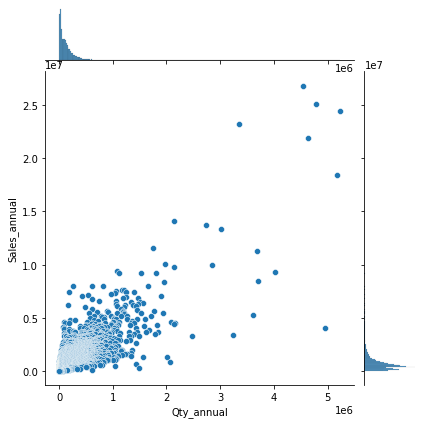

In [58]:
#drop items removed from current years

x1, y1 = [0,0], [5, 8]

ax = sns.jointplot(data = us_data, x = 'Qty_annual', y = 'Sales_annual')
ax.plot(lims, lims, color = 'black', linestyle = 'dashed', linewidth = 10)

plt.show()

In [63]:
np.quantile(us_data.Qty_annual)

TypeError: _quantile_dispatcher() missing 1 required positional argument: 'q'

There are duplicates with exact same descrition. 41rows? or 49?

## A method (가장 고난이도이고 상의가 필요)

각 카테고리별 비율 정하기
1 department당 아이템 distribution graph를 보고 정하기
2 category당 아이템 distribution graph를 보고 정하기


## B method

각 카테고리마다 하위 50퍼 버리고 상위 50퍼 유지


In [116]:
#sort UPC with annual quantity percentage
b = us_data.groupby(['Department', 'Category', 'Subcategory', 'Brand', 'Description'], as_index=False).size()
b

Department  \
0                        ALCOHOL   
1                        ALCOHOL   
2                        ALCOHOL   
3                        ALCOHOL   
4                        ALCOHOL   
5                        ALCOHOL   
6                        ALCOHOL   
7                        ALCOHOL   
8                        ALCOHOL   
9                        ALCOHOL   
10                       ALCOHOL   
11                       ALCOHOL   
12                       ALCOHOL   
13                       ALCOHOL   
14                       ALCOHOL   
15                       ALCOHOL   
16                       ALCOHOL   
17                       ALCOHOL   
18                       ALCOHOL   
19                       ALCOHOL   
20                       ALCOHOL   
21                       ALCOHOL   
22                       ALCOHOL   
23                       ALCOHOL   
24                       ALCOHOL   
25                       ALCOHOL   
26                       ALCOHOL   
27                       ALCOHOL   
28                       ALCOHOL   
29                       ALCOHOL   
30                       ALCOHOL   
31                       ALCOHOL   
32                       ALCOHOL   
33                       ALCOHOL   
34                       ALCOHOL   
35                       ALCOHOL   
36                       ALCOHOL   
37                       ALCOHOL   
38                       ALCOHOL   
39                       ALCOHOL   
40                       ALCOHOL   
41                       ALCOHOL   
42                       ALCOHOL   
43                       ALCOHOL   
44                       ALCOHOL   
45                       ALCOHOL   
46                       ALCOHOL   
47                       ALCOHOL   
48                       ALCOHOL   
49                       ALCOHOL   
50                       ALCOHOL   
51                       ALCOHOL   
52                       ALCOHOL   
53                       ALCOHOL   
54                       ALCOHOL   
55                       ALCOHOL   
56                       ALCOHOL   
57                       ALCOHOL   
58                       ALCOHOL   
59                       ALCOHOL   
60                       ALCOHOL   
61                       ALCOHOL   
62                       ALCOHOL   
63                       ALCOHOL   
64                       ALCOHOL   
65                       ALCOHOL   
66                       ALCOHOL   
67                       ALCOHOL   
68                       ALCOHOL   
69                       ALCOHOL   
70                       ALCOHOL   
71                       ALCOHOL   
72                       ALCOHOL   
73                       ALCOHOL   
74                       ALCOHOL   
75                       ALCOHOL   
76                       ALCOHOL   
77                       ALCOHOL   
78                       ALCOHOL   
79                       ALCOHOL   
80                       ALCOHOL   
81                       ALCOHOL   
82                       ALCOHOL   
83                       ALCOHOL   
84                       ALCOHOL   
85                       ALCOHOL   
86                       ALCOHOL   
87                       ALCOHOL   
88                       ALCOHOL   
89                       ALCOHOL   
90                       ALCOHOL   
91                       ALCOHOL   
92                       ALCOHOL   
93                       ALCOHOL   
94                       ALCOHOL   
95                       ALCOHOL   
96                       ALCOHOL   
97                       ALCOHOL   
98                       ALCOHOL   
99                       ALCOHOL   
100                      ALCOHOL   
101                      ALCOHOL   
102                      ALCOHOL   
103                      ALCOHOL   
104                      ALCOHOL   
105                      ALCOHOL   
106                      ALCOHOL   
107                      ALCOHOL   
108                      ALCOHOL   
109                      ALCOHOL   
110                      A

In [151]:
us_copy = us_data.copy()
duplicated_us = us_data[us_data.Description.duplicated() == 1].Rank.values
duplicated_us

array([ 254, 1224, 1558, 1683, 2943, 3073, 3292, 3764, 4900, 5192, 5302,
       5408, 5659, 6144, 7105, 7509, 7665, 8007, 8055, 8143, 8157, 8302,
       8521, 8570, 8770, 8809, 8944, 8965, 9080, 9083, 9109, 9201, 9319,
       9361, 9471, 9568, 9667, 9722, 9747, 9771, 9793, 9808, 9834, 9895,
       9926, 9951, 9955, 9963, 9965], dtype=int64)

In [158]:
us_data[us_data.Description.duplicated() == 1].sort_values('Description')

UPC  Rank  Dpmt_rank           Department  \
5302  00-37000-38851  5302         76  GENERAL MERCHANDISE   
5192  00-30772-01467  5192         74  GENERAL MERCHANDISE   
8965  00-30772-01518  8965        296  GENERAL MERCHANDISE   
8770  00-37000-61789  8770        269  GENERAL MERCHANDISE   
6144  00-37000-60821  6144        102  GENERAL MERCHANDISE   
8055  00-42000-94443  8055        180  GENERAL MERCHANDISE   
9109  00-37000-41823  9109        319  GENERAL MERCHANDISE   
8809  00-37000-40213  8809        275  GENERAL MERCHANDISE   
5659  00-37000-40218  5659         88  GENERAL MERCHANDISE   
3764  06-06995-00228  3764        463               FROZEN   
5408  75-03015-78068  5408        562              PRODUCE   
7665  00-41570-05260  7665       3400              GROCERY   
8143  75-03023-83505  8143        169                OTHER   
8157  07-01080-04046  8157        171                OTHER   
7105  08-14570-01000  7105        116                OTHER   
9471  08-40243-13062  9471        165                  PET   
9667  08-79199-00120  9667        483                OTHER   
8302  07-63176-12006  8302        688              ALCOHOL   
254   07-15756-10059   254         65              PRODUCE   
9361  08-55912-00006  9361        327                OTHER   
9722  08-55912-00002  9722        522                OTHER   
3292  07-71163-01051  3292        414              PRODUCE   
3073  07-71163-00071  3073        394              PRODUCE   
4900  06-42205-00436  4900        588               FROZEN   
9080  08-18336-01282  9080        105                  PET   
2943  08-53447-00302  2943        381              PRODUCE   
8007  07-23830-21212  8007        569              ALCOHOL   
7509  07-23830-00020  7509        455              ALCOHOL   
1558  08-11334-02028  1558        254              PRODUCE   
9955  00-28200-13570  9955        755                OTHER   
1683  00-80660-95757  1683         70              ALCOHOL   
8570  00-80660-95755  8570        799              ALCOHOL   
9951  08-16588-03153  9951        751                OTHER   
9083  08-16588-03148  9083        275                OTHER   
9895  77-54856-00020  9895        695                OTHER   
9568  08-85677-00094  9568        412                OTHER   
9319  00-74470-10227  9319        317                OTHER   
9793  08-55912-00005  9793        593                OTHER   
1224  00-30223-04152  1224        210              PRODUCE   
8944  00-35000-97122  8944        361            BODY CARE   
8521  07-33710-10110  8521        209                OTHER   
9834  08-40598-01016  9834        634                OTHER   
9201  08-75500-36155  9201        300                OTHER   
9926  00-73917-64934  9926        726                OTHER   
9771  07-99366-46141  9771        571                OTHER   
9963  07-99366-23008  9963        763                OTHER   
9747  00-75239-00401  9747        547                OTHER   
9808  00-75239-00442  9808        608                OTHER   
9965  00-75239-00417  9965        765                OTHER   

                                          Category  \
5302                            HOUSEHOLD PRODUCTS   
5192                            HOUSEHOLD PRODUCTS   
8965                            HOUSEHOLD PRODUCTS   
8770                            HOUSEHOLD PRODUCTS   
6144                            HOUSEHOLD PRODUCTS   
8055                            HOUSEHOLD PRODUCTS   
9109                 HOUSEHOLD CLEANERS & SUPPLIES   
8809                 HOUSEHOLD CLEANERS & SUPPLIES   
5659                 HOUSEHOLD CLEANERS & SUPPLIES   
3764  FROZEN & REFRIGERATED MEAT POULTRY & SEAFOOD   
5408                                       PRODUCE   
7665                 SHELF STABLE PLANT BASED MILK   
8143                     OTHER MISCELLANEOUS ITEMS   
8157                     OTHER MISCELLANEOUS ITEMS   
7105                     OTHER MISCELLANEOUS ITEMS   
9471                                      PET FOOD  

In [156]:
us_copy[~us_copy.Rank.isin(duplicated_us)]

UPC   Rank  Dpmt_rank    Department  \
1      08-61745-00001      1          1  REFRIGERATED   
2      07-15756-20011      2          1       PRODUCE   
3      07-15756-10004      3          2       PRODUCE   
4      08-61745-00002      4          2  REFRIGERATED   
5      07-15756-20002      5          3       PRODUCE   
...               ...    ...        ...           ...   
9996   00-73361-64992   9996        796         OTHER   
9997   00-65780-24649   9997        797         OTHER   
9998   07-19812-28081   9998        798         OTHER   
9999   08-53662-00200   9999        799         OTHER   
10000  00-70989-10422  10000        800         OTHER   

                        Category                   Subcategory  \
1              REFRIGERATED EGGS                       RF EGGS   
2                        PRODUCE        PRODUCE PACKAGED FRUIT   
3                        PRODUCE        PRODUCE PACKAGED FRUIT   
4              REFRIGERATED EGGS                       RF EGGS   
5                        PRODUCE        PRODUCE PACKAGED FRUIT   
...                          ...                           ...   
9996   OTHER MISCELLANEOUS ITEMS                MEDIA PRODUCTS   
9997   OTHER MISCELLANEOUS ITEMS      FLORAL & GARDEN PRODUCTS   
9998   OTHER MISCELLANEOUS ITEMS              KITCHEN PRODUCTS   
9999   OTHER MISCELLANEOUS ITEMS  OTHER MISCELLANEOUS ITEMS IV   
10000  OTHER MISCELLANEOUS ITEMS                MEDIA PRODUCTS   

                           Brand                                  Description  \
1                    VITAL FARMS      Vital Farms Pasture Raised Eggs Lg 12ct   
2              DRISCOLLS ORGANIC               Driscolls Strawbrries Og 16 Oz   
3              DRISCOLLS ORGANIC                Driscolls Raspberries Og 6 Oz   
4                    VITAL FARMS   Vital Farms Pasture Raised Eggs Lg Og 12ct   
5                      DRISCOLLS                   Driscolls Strawberry 16 Oz   
...                          ...                                          ...   
9996   EASTERN NEWS DISTRIBUTORS     Hearst Bkzine 5                     1 Ea   
9997    BRND UNKN FLORAL NURSERY                                Cb-solomio-rd   
9998                         OXO                               Oxo Can Opener   
9999                PEARLESSENCE                         Tacoma Firelogs 8 Ct   
10000       ONE SOURCE MAGAZINES  Magazine Clean Eating Healing Foods Special   

       Sales_annual  Sales_annual_yago  Sales_annual_perc  Qty_annual  \
1       26806761.79        25207790.64           0.063432   4538381.3   
2       25070674.58        23446355.44           0.069278   4782167.9   
3       24393132.49        20340546.25           0.199237   5227224.6   
4       23186780.66        18460865.88           0.255996   3355896.5   
5       21930490.90        24124165.86          -0.090933   4627108.7   
...             ...                ...                ...         ...   
9996       72839.61           42715.19           0.705239      5216.2   
9997       72768.12           56823.83           0.280592     13200.7   
9998       72737.39           70372.73           0.033602      4409.9   
9999       72732.94           61364.91           0.185253     10735.4   
10000      72708.33          245485.28          -0.703818      5619.1   

       Qty_annual_yago  Qty_annual_perc  ARP_annual  ARP_annaul_yago  \
1            4364742.8         0.039782        5.91             5.78   
2            4374364.6         0.093226        5.24             5.36   
3            4409289.7         0.185503        4.67             4.61   
4            2696240.8         0.244658        6.91             6.85   
5            6001949.2        -0.229066        4.74             4.02   
...                ...              ...         ...              ...   
9996            3059.5         0.704919       13.96            13.96   
9997           11364.9         0.161532        5.51             5.00   
9998            4667.0        -0.055089   

## C method
각 서브 카테고리마다 하위 50퍼 버리고 상위 50퍼 유지